In [276]:
# ME228 Final Project: Fraud Detection in Financial Transactions
#Name:Kunta Sathwika  
#Student ID:23B3302
#Source of Data:Yahoo Finance (via `yfinance` library)  
#Source of Code: Developed completely by me  

In [5]:
!pip install yfinance

     ---------------------------------------- 0.0/949.0 kB ? eta -:--:--
     ---------------------------------------- 10.2/949.0 kB ? eta -:--:--
     ---------------------------------------- 10.2/949.0 kB ? eta -:--:--
     ---------------------------------------- 10.2/949.0 kB ? eta -:--:--
     ---------------------------------------- 10.2/949.0 kB ? eta -:--:--
     ------ ----------------------------- 163.8/949.0 kB 821.4 kB/s eta 0:00:01
     -------- --------------------------- 225.3/949.0 kB 919.0 kB/s eta 0:00:01
     -------- --------------------------- 225.3/949.0 kB 919.0 kB/s eta 0:00:01
     ---------- ------------------------- 286.7/949.0 kB 886.2 kB/s eta 0:00:01
     ------------------------ ------------- 604.2/949.0 kB 1.6 MB/s eta 0:00:01
     -------------------------- ----------- 655.4/949.0 kB 1.6 MB/s eta 0:00:01
     -------------------------- ----------- 655.4/949.0 kB 1.6 MB/s eta 0:00:01
     -------------------------------------- 949.0/949.0 kB 1.8 MB/s eta

In [106]:
import numpy as np                 # For numerical operations
import pandas as pd                # For data handling
import matplotlib.pyplot as plt    # For visualization
import yfinance as yf              # To fetch historical stock data
from sklearn.preprocessing import MinMaxScaler  # For data normalization
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Evaluation metrics
from tensorflow.keras.models import Sequential  # To build the model
from tensorflow.keras.layers import Dense, LSTM 

In [210]:
# Download stock data for Apple from Yahoo Finance
df = yf.download('AAPL', start='2015-01-01', end='2024-12-31')
# Display the first few rows to understand the structure
print("Data Sample:")
print(df.head())

[*********************100%***********************]  1 of 1 completed

Data Sample:
Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.320433  24.789802  23.879981  24.778679  212818400
2015-01-05  23.635286  24.169166  23.448429  24.089084  257142000
2015-01-06  23.637512  23.897778  23.274918  23.699798  263188400
2015-01-07  23.968962  24.069063  23.735389  23.846614  160423600
2015-01-08  24.889906  24.947743  24.180291  24.298190  237458000


In [212]:
# Extract the 'Close' price column for prediction
data = df.filter(['Close']) # Extracting using .filter()
dataset = df[['Close']] # Alternatively using [[]] to get DataFrame format
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [228]:
# Define how many past days we want to use for prediction
training_data_len = int(len(scaled_data) * 0.8)
# Create training dataset
train_data = scaled_data[0:training_data_len, :]

In [230]:
# Split into X_train and y_train
x_train = []
y_train = []
# Use 60 previous days to predict the 61st
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    # Convert to numpy arrays and reshape for LSTM input
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [232]:
from keras import Input
# Define LSTM model
model = Sequential()
model.add(Input(shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))  # Final output layer


In [234]:
# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0149
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.7886e-04
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.7810e-04
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 2.5397e-04
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 2.5258e-04
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.5105e-04
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.3355e-04
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.0554e-04
Epoch 9/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0710e-04
Epoch 10/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 2.0022e-04


In [235]:
# Create test data
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset.iloc[training_data_len:, :]

In [236]:
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])


In [237]:
# Convert and reshape
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [238]:
# Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step


In [239]:
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

In [240]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 5.39
Root Mean Squared Error (RMSE): 6.87
R² Score: 0.9409


In [241]:
train = pd.DataFrame(scaler.inverse_transform(train_data), columns=['Close'])
valid = pd.DataFrame(scaler.inverse_transform(scaled_data[training_data_len:]), columns=['Close'])

# Add predictions column to valid
valid['Predictions'] = predictions

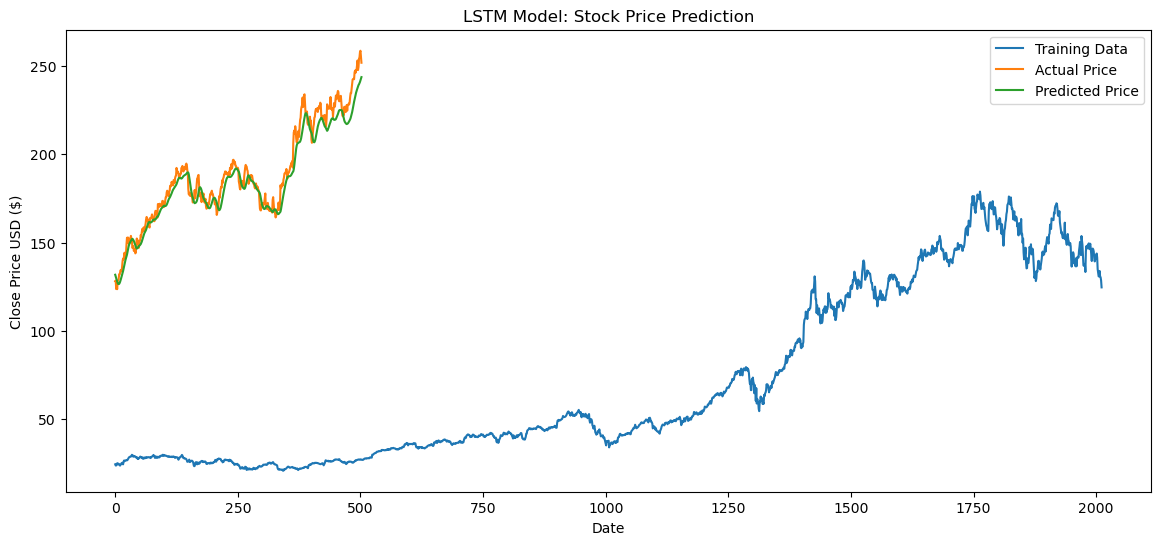

In [242]:
# Plotting results
plt.figure(figsize=(14, 6))
plt.title('LSTM Model: Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'], label='Training Data')
plt.plot(valid['Close'], label='Actual Price')
plt.plot(valid['Predictions'], label='Predicted Price')
plt.legend()
plt.show()

In [243]:
data = df  # this sets the DataFrame correctly

last_60_days = data['Close'].values[-60:].reshape(-1, 1)
last_60_scaled = scaler.transform(last_60_days)

# Prepare input for prediction
X_test_future = []
X_test_future.append(last_60_scaled)
X_test_future = np.array(X_test_future)
X_test_future = np.reshape(X_test_future, (X_test_future.shape[0], X_test_future.shape[1], 1))

# Predict
predicted_price = model.predict(X_test_future)
predicted_price = scaler.inverse_transform(predicted_price)
print("Predicted price for next day:", predicted_price[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted price for next day: 244.08997


In [244]:
future_price = model.predict(X_test_future)
future_price = scaler.inverse_transform(future_price)

print(f"Predicted next day price: ${future_price[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted next day price: $244.09


In [245]:
print(train.columns)
print(valid.columns)

Index(['Close'], dtype='object')
Index(['Close', 'Predictions'], dtype='object')


In [246]:
print(data.columns)

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [247]:
#Get the last 60 days from the scaled dataset
last_60_days = scaled_data[-60:]
future_input = last_60_days.reshape(1, 60, 1)
future_predictions = []

In [248]:
#Predict the next 30 days
for _ in range(30):
    pred = model.predict(future_input, verbose=0)
    future_predictions.append(pred[0, 0])
    # Update the input by appending the prediction and removing the first timestep
    future_input = np.append(future_input[:, 1:, :], [[[pred[0, 0]]]], axis=1)

In [249]:
#Inverse scale the predictions
future_predictions_unscaled = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

In [250]:
#Create future dates
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

In [251]:
#Create DataFrame for future predictions
future_df = pd.DataFrame({'Date': future_dates, 'Predicted Close Price': future_predictions_unscaled.flatten()})
future_df.set_index('Date', inplace=True)

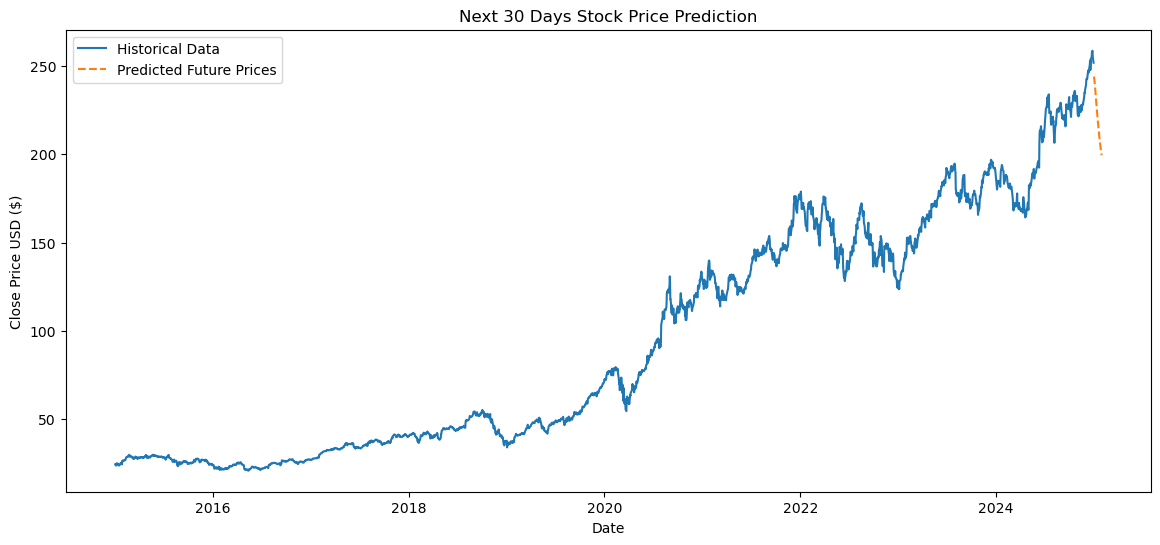

In [252]:
#Plot
plt.figure(figsize=(14, 6))
plt.title('Next 30 Days Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'], label='Historical Data')
plt.plot(future_df['Predicted Close Price'], label='Predicted Future Prices', linestyle='--')
plt.legend()
plt.show()